In [1]:
import pandas as pd
import numpy as np
from pandas import DataFrame

import matplotlib.pyplot as plt
import seaborn as sns

# Part 0: Extract data for five states
* If your computer does not have enough RAM to run the following read-in statement, you can skip this part and go to Part 1 directly. 

In [7]:
path=r'C:\Users\aleci\Documents\Project 3 - Mortgage Origination Analysis\data\\'

columns=["POOL_ID", "LOAN_ID", "ACT_PERIOD", "CHANNEL", "SELLER", "SERVICER",
                        "MASTER_SERVICER", "ORIG_RATE", "CURR_RATE", "ORIG_UPB", "ISSUANCE_UPB",
                        "CURRENT_UPB", "ORIG_TERM", "ORIG_DATE", "FIRST_PAY", "LOAN_AGE",
                        "REM_MONTHS", "ADJ_REM_MONTHS", "MATR_DT", "OLTV", "OCLTV",
                        "NUM_BO", "DTI", "CSCORE_B", "CSCORE_C", "FIRST_FLAG", "PURPOSE",
                        "PROP", "NO_UNITS", "OCC_STAT", "STATE", "MSA", "ZIP", "MI_PCT",
                        "PRODUCT", "PPMT_FLG", "IO", "FIRST_PAY_IO", "MNTHS_TO_AMTZ_IO",
                        "DLQ_STATUS", "PMT_HISTORY", "MOD_FLAG", "MI_CANCEL_FLAG", "Zero_Bal_Code",
                        "ZB_DTE", "LAST_UPB", "RPRCH_DTE", "CURR_SCHD_PRNCPL", "TOT_SCHD_PRNCPL",
                        "UNSCHD_PRNCPL_CURR", "LAST_PAID_INSTALLMENT_DATE", "FORECLOSURE_DATE",
                        "DISPOSITION_DATE", "FORECLOSURE_COSTS", "PROPERTY_PRESERVATION_AND_REPAIR_COSTS",
                        "ASSET_RECOVERY_COSTS", "MISCELLANEOUS_HOLDING_EXPENSES_AND_CREDITS",
                        "ASSOCIATED_TAXES_FOR_HOLDING_PROPERTY", "NET_SALES_PROCEEDS",
                        "CREDIT_ENHANCEMENT_PROCEEDS", "REPURCHASES_MAKE_WHOLE_PROCEEDS",
                        "OTHER_FORECLOSURE_PROCEEDS", "NON_INTEREST_BEARING_UPB", "PRINCIPAL_FORGIVENESS_AMOUNT",
                        "ORIGINAL_LIST_START_DATE", "ORIGINAL_LIST_PRICE", "CURRENT_LIST_START_DATE",
                        "CURRENT_LIST_PRICE", "ISSUE_SCOREB", "ISSUE_SCOREC", "CURR_SCOREB",
                        "CURR_SCOREC", "MI_TYPE", "SERV_IND", "CURRENT_PERIOD_MODIFICATION_LOSS_AMOUNT",
                        "CUMULATIVE_MODIFICATION_LOSS_AMOUNT", "CURRENT_PERIOD_CREDIT_EVENT_NET_GAIN_OR_LOSS",
                        "CUMULATIVE_CREDIT_EVENT_NET_GAIN_OR_LOSS", "HOMEREADY_PROGRAM_INDICATOR",
                        "FORECLOSURE_PRINCIPAL_WRITE_OFF_AMOUNT", "RELOCATION_MORTGAGE_INDICATOR",
                        "ZERO_BALANCE_CODE_CHANGE_DATE", "LOAN_HOLDBACK_INDICATOR", "LOAN_HOLDBACK_EFFECTIVE_DATE",
                        "DELINQUENT_ACCRUED_INTEREST", "PROPERTY_INSPECTION_WAIVER_INDICATOR",
                        "HIGH_BALANCE_LOAN_INDICATOR", "ARM_5_YR_INDICATOR", "ARM_PRODUCT_TYPE",
                        "MONTHS_UNTIL_FIRST_PAYMENT_RESET", "MONTHS_BETWEEN_SUBSEQUENT_PAYMENT_RESET",
                        "INTEREST_RATE_CHANGE_DATE", "PAYMENT_CHANGE_DATE", "ARM_INDEX",
                        "ARM_CAP_STRUCTURE", "INITIAL_INTEREST_RATE_CAP", "PERIODIC_INTEREST_RATE_CAP",
                        "LIFETIME_INTEREST_RATE_CAP", "MARGIN", "BALLOON_INDICATOR",
                        "PLAN_NUMBER", "FORBEARANCE_INDICATOR", "HIGH_LOAN_TO_VALUE_HLTV_REFINANCE_OPTION_INDICATOR",
                        "DEAL_NAME", "RE_PROCS_FLAG", "ADR_TYPE", "ADR_COUNT", "ADR_UPB"]

# Because the original data in csv file is very big, we need to read in by chunk.
# You can adjust the chunk size, depending on the capacity of your computer
chunk_size=10000

def getfile(year_quarter, state_name):
    mylist=[]
    for chunk in pd.read_csv(path+'20'+str(year_quarter)+'.csv', sep="|", names=columns, header=None, 
                             low_memory=False, error_bad_lines=False, chunksize=chunk_size):
        chunk=chunk[chunk['STATE']==state_name]
        mylist.append(chunk)
    file=pd.concat(mylist, axis=0)  

    # Export the output file to csv so that we do not need to repeat the same exercise when we need to use the same data next time
    file.to_csv(path+'file_20'+str(year_quarter)+'_'+str(state_name)+'.csv', index=False)
    return file

file_2008q1_MI=getfile("08Q1", 'MI') 
file_2018q1_MI=getfile("18Q1", 'MI') 

file_2008q1_CO=getfile("08Q1", 'CO') 
file_2018q1_CO=getfile("18Q1", 'CO') 

file_2008q1_GA=getfile("08Q1", 'GA') 
file_2018q1_GA=getfile("18Q1", 'GA') 

file_2008q1_VA=getfile("08Q1", 'VA') 
file_2018q1_VA=getfile("18Q1", 'VA') 

file_2008q1_OH=getfile("08Q1", 'OH') 
file_2018q1_OH=getfile("18Q1", 'OH') 

C:\Users\aleci\AppData\Local\Temp/ipykernel_3904/4207610290.py:50: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version.


  file_2008q1_MI=getfile("08Q1", 'MI')
C:\Users\aleci\AppData\Local\Temp/ipykernel_3904/4207610290.py:51: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version.


  file_2018q1_MI=getfile("18Q1", 'MI')


# Part 1: Read in the data
* If your computer does not have enough RAM, start here.
* If data of four states are too big, you can use Google Colab.  You can only select one or two states for run the same analysis.

In [8]:
file_2008q1_MI=pd.read_csv(path+'file_2008Q1_MI.csv')
file_2018q1_MI=pd.read_csv(path+'file_2018Q1_MI.csv')

C:\Users\aleci\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3444: DtypeWarning: Columns (40,101,105) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)
C:\Users\aleci\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3444: DtypeWarning: Columns (105) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [9]:
# If your computer does not have enough RAM to run the following read-in statement, you can skip above two cells and use the following cell to read in the samples.
file_2008q1_OH=pd.read_csv(path+'file_2008Q1_OH.csv')
file_2008q1_VA=pd.read_csv(path+'file_2008Q1_VA.csv')
file_2008q1_GA=pd.read_csv(path+'file_2008Q1_GA.csv')


file_2018q1_OH=pd.read_csv(path+'file_2018Q1_OH.csv')
file_2018q1_VA=pd.read_csv(path+'file_2018Q1_VA.csv')
file_2018q1_GA=pd.read_csv(path+'file_2018Q1_GA.csv')

In [10]:
file_2008q1=pd.concat([file_2008q1_OH, file_2008q1_VA, file_2008q1_GA, file_2008q1_MI])
file_2018q1=pd.concat([file_2018q1_OH, file_2018q1_VA, file_2018q1_GA, file_2018q1_MI])

In [11]:
file_2018q1.head()

,POOL_ID,LOAN_ID,ACT_PERIOD,CHANNEL,SELLER,SERVICER,MASTER_SERVICER,ORIG_RATE,CURR_RATE,ORIG_UPB,...,MARGIN,BALLOON_INDICATOR,PLAN_NUMBER,FORBEARANCE_INDICATOR,HIGH_LOAN_TO_VALUE_HLTV_REFINANCE_OPTION_INDICATOR,DEAL_NAME,RE_PROCS_FLAG,ADR_TYPE,ADR_COUNT,ADR_UPB
0,NaN,100001040173,22018,R,"Quicken Loans, Llc",Quicken Loans Inc.,NaN,4.25,4.25,453000.0,...,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN
1,NaN,100001040173,32018,R,"Quicken Loans, Llc",Quicken Loans Inc.,NaN,4.25,4.25,453000.0,...,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN
2,NaN,100001040173,42018,R,"Quicken Loans, Llc",Quicken Loans Inc.,NaN,4.25,4.25,453000.0,...,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN
3,NaN,100001040173,52018,R,"Quicken Loans, Llc",Quicken Loans Inc.,NaN,4.25,4.25,453000.0,...,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN
4,NaN,100001040173,62018,R,"Quicken Loans, Llc",Quicken Loans Inc.,NaN,4.25,4.25,453000.0,...,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN


## Each of the above files contains all performance history of loans originated in Q1 2008 and Q1 2020.
* After a loan has been originated, the borrower will make monthly payment.   With each payment, the principal owed will decrease.
* The above data contains all monthly payment information.  that is one loan will contain multiple rows of data. 
* But our analysis now does not consider this. We want to compare loan characteristics and quality at the time of origination, so we only need one row for each loan. 

In [12]:
nodup_2008q1=file_2008q1.drop_duplicates(subset=['POOL_ID', 'LOAN_ID'], keep='first')
nodup_2018q1=file_2018q1.drop_duplicates(subset=['POOL_ID', 'LOAN_ID'], keep='first')

In [13]:
nodup_2008q1.groupby('STATE')['LOAN_ID'].count()

STATE
GA    11480
MI    11530
OH    11450
VA    11877
Name: LOAN_ID, dtype: int64

In [14]:
nodup_2018q1.groupby('STATE')['LOAN_ID'].count()

STATE
GA    13989
MI    14316
OH    11815
VA    11092
Name: LOAN_ID, dtype: int64

# Part II: Analysis

### A financial crisis happend in Q3 2008.  It was caused by underwriting (approval of loan applications) of many subprime mortgage loans.
* A loan with FICO < 580 is considered as a subprime loan（次贷）.  The applicant has some bad credit records such as a lot of delinquencies, history of bankrupty, etc.
* Before Q3 2008, a lot of such subprime mortgage loans were issued.  They bombed in Q3 2008.
* After Q3 2008, US government tightened some rules for underwriting. 
* We want to compare the difference in some key metrics between Q1 2008 and Q1 2020. 

### Analysis 1: Loan Quality - FICO
* We use FICO score as an indicator for loan quality.
* Loan with higher scores are considered to have higher quality. 

In [15]:
# check the FICO score for loan origination 2008Q1
nodup_2008q1[["CSCORE_B", "CSCORE_C"]].dropna().mean()

CSCORE_B    742.583858
CSCORE_C    744.307487
dtype: float64

In [17]:
# check the FICO score for loan origination 2020Q1
nodup_2018q1[["CSCORE_B", "CSCORE_C"]].dropna().mean()

CSCORE_B    753.791382
CSCORE_C    755.861868
dtype: float64

* On average loans originated in 23008 Q1 have lower fico scores, hence a lower quality.
* We want to run an more elaborate analysis. 

In [18]:
# If there are two applicants for a loan (usually a husband and a wife), loan company usually use the lower FICO of the two. 
# With only one applicant, CSCORE_C will be missing. 

nodup_2008q1['min_fico']=nodup_2008q1[["CSCORE_B", "CSCORE_C"]].min(axis=1)
print(nodup_2008q1[["CSCORE_B", "CSCORE_C", 'min_fico']].head())
print("Average FICO in Q1 2008: {}".format(nodup_2008q1['min_fico'].mean()))

nodup_2018q1['min_fico']=nodup_2018q1[["CSCORE_B", "CSCORE_C"]].min(axis=1)
print(nodup_2018q1[["CSCORE_B", "CSCORE_C", 'min_fico']].head())
print("Average FICO in Q1 2018: {}".format(nodup_2018q1['min_fico'].mean()))

     CSCORE_B  CSCORE_C  min_fico
0       673.0       NaN     673.0
41      710.0       NaN     710.0
97      626.0     596.0     596.0
144     635.0       NaN     635.0
163     777.0     813.0     777.0
Average FICO in Q1 2008: 728.7063130385952
     CSCORE_B  CSCORE_C  min_fico
0       791.0       NaN     791.0
29      781.0       NaN     781.0
66      743.0       NaN     743.0
115     775.0     744.0     744.0
144     703.0       NaN     703.0
Average FICO in Q1 2018: 742.7649702939337


C:\Users\aleci\AppData\Local\Temp/ipykernel_3904/3527577728.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  nodup_2008q1['min_fico']=nodup_2008q1[["CSCORE_B", "CSCORE_C"]].min(axis=1)
C:\Users\aleci\AppData\Local\Temp/ipykernel_3904/3527577728.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  nodup_2018q1['min_fico']=nodup_2018q1[["CSCORE_B", "CSCORE_C"]].min(axis=1)


In [19]:
# We want to assign fico scores to the following band/tier/bin 
def fico_tier(x):
    if x < 580: 
        return '580 & below'
    elif x <= 620: 
        return '581-620'
    elif x <= 660:
        return '621-660'
    elif x <= 700:
        return '661-700'
    elif x <= 740:
        return '701-740'
    elif x <=780:
        return '741-780'
    elif x <=800:
        return '781-820'
    else:
        return '820+'
    
nodup_2008q1['fico_band']=nodup_2008q1['min_fico'].apply(fico_tier)
nodup_2018q1['fico_band']=nodup_2018q1['min_fico'].apply(fico_tier)

C:\Users\aleci\AppData\Local\Temp/ipykernel_3904/1941197831.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  nodup_2008q1['fico_band']=nodup_2008q1['min_fico'].apply(fico_tier)
C:\Users\aleci\AppData\Local\Temp/ipykernel_3904/1941197831.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  nodup_2018q1['fico_band']=nodup_2018q1['min_fico'].apply(fico_tier)


In [20]:
# summarize the loans to their fico band/tier/bin

summary_2008q1=nodup_2008q1.groupby('fico_band')['LOAN_ID'].count().reset_index().rename(columns={'LOAN_ID': 'loan count'})
print(summary_2008q1.head(10))

# calculate the percentage of loans in each fico band
summary_2008q1['loan count pct']=summary_2008q1['loan count']/len(nodup_2008q1['LOAN_ID'])
print(summary_2008q1.head(10))

     fico_band  loan count
0  580 & below         289
1      581-620        1671
2      621-660        4437
3      661-700        7942
4      701-740        9534
5      741-780       12233
6      781-820        6927
7         820+        3304
     fico_band  loan count  loan count pct
0  580 & below         289        0.006237
1      581-620        1671        0.036062
2      621-660        4437        0.095755
3      661-700        7942        0.171397
4      701-740        9534        0.205754
5      741-780       12233        0.264001
6      781-820        6927        0.149492
7         820+        3304        0.071304


In [21]:
summary_2018q1=nodup_2018q1.groupby('fico_band')['LOAN_ID'].count().reset_index().rename(columns={'LOAN_ID': 'loan count'})
print(summary_2018q1.head(10))

# calculate the percentage of loans in each fico band
summary_2018q1['loan count pct']=summary_2018q1['loan count']/len(nodup_2018q1['LOAN_ID'])
print(summary_2018q1.head(10))

  fico_band  loan count
0   581-620          56
1   621-660        3224
2   661-700        7332
3   701-740       11754
4   741-780       15036
5   781-820        8752
6      820+        5058
  fico_band  loan count  loan count pct
0   581-620          56        0.001093
1   621-660        3224        0.062954
2   661-700        7332        0.143170
3   701-740       11754        0.229517
4   741-780       15036        0.293603
5   781-820        8752        0.170897
6      820+        5058        0.098766


In [22]:
# merge the two summary files
summary_two=pd.merge(summary_2008q1.rename(columns={'loan count': 'loan count 2008Q1', 'loan count pct': 'loan count pct 2008Q1'}),
                     summary_2018q1.rename(columns={'loan count': 'loan count 2018Q1', 'loan count pct': 'loan count pct 2018Q1'}),
                     on='fico_band', how='outer')

summary_two.head(10)

,fico_band,loan count 2008Q1,loan count pct 2008Q1,loan count 2018Q1,loan count pct 2018Q1
0,580 & below,289,0.006237,NaN,NaN
1,581-620,1671,0.036062,56.0,0.001093
2,621-660,4437,0.095755,3224.0,0.062954
3,661-700,7942,0.171397,7332.0,0.143170
4,701-740,9534,0.205754,11754.0,0.229517
5,741-780,12233,0.264001,15036.0,0.293603
6,781-820,6927,0.149492,8752.0,0.170897
7,820+,3304,0.071304,5058.0,0.098766


In [23]:
# For fico bands with missing value, we impute them with zero
summary_two.fillna(0, inplace=True)
summary_two.head(10)

,fico_band,loan count 2008Q1,loan count pct 2008Q1,loan count 2018Q1,loan count pct 2018Q1
0,580 & below,289,0.006237,0.0,0.000000
1,581-620,1671,0.036062,56.0,0.001093
2,621-660,4437,0.095755,3224.0,0.062954
3,661-700,7942,0.171397,7332.0,0.143170
4,701-740,9534,0.205754,11754.0,0.229517
5,741-780,12233,0.264001,15036.0,0.293603
6,781-820,6927,0.149492,8752.0,0.170897
7,820+,3304,0.071304,5058.0,0.098766


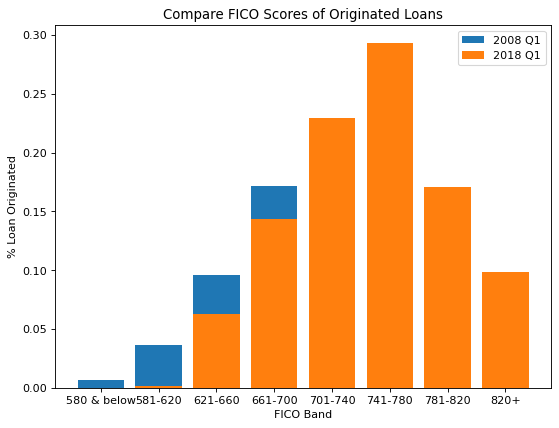

In [24]:
from matplotlib.pyplot import figure

figure(figsize=(8, 6), dpi=80)

plt.bar(summary_two['fico_band'], summary_two['loan count pct 2008Q1'], label='2008 Q1')
plt.bar(summary_two['fico_band'], summary_two['loan count pct 2018Q1'], label='2018 Q1')

plt.xlabel("FICO Band")
plt.ylabel("% Loan Originated")
plt.title("Compare FICO Scores of Originated Loans")
plt.legend()
plt.show()

* The above bar chart does not reveal well the difference between two groups of loans. We need to improve the graph.
* We need to improve it.

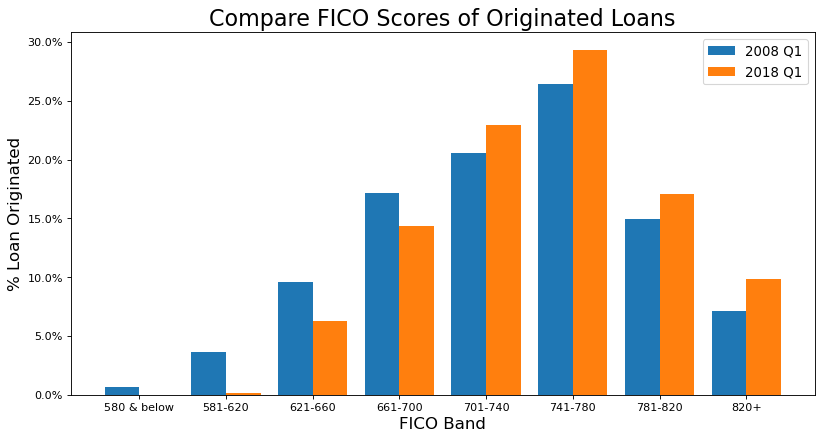

In [25]:
from matplotlib.pyplot import figure
import matplotlib.ticker as mtick  # for formating y axis

figure(figsize=(12, 6), dpi=80)

all_bands=['580 & below', '581-620', '621-660', '661-700', '701-740', '741-780', '781-820', '820+']
x_axis=np.arange(len(all_bands))

# width of each bar
width=0.3

plt.bar(x_axis-0.2, summary_two['loan count pct 2008Q1'], width=0.4, label='2008 Q1')
plt.bar(x_axis+0.2, summary_two['loan count pct 2018Q1'], width=0.4, label='2018 Q1')

plt.xlabel("FICO Band", fontsize=15)
plt.ylabel("% Loan Originated", fontsize=15)
plt.title("Compare FICO Scores of Originated Loans", fontsize=20)
plt.xticks(x_axis, (all_bands))
plt.gca().yaxis.set_major_formatter(mtick.PercentFormatter(xmax=1.0))     # format y axis in %
plt.legend(loc='best', fontsize=12)
plt.show()

### Now the chart looks much better for a comparison.
* Loans originated in 2018 Q1 are more likely to concentrated in bands with higher FICO scores. 
* It suggests that loans originated in 2018 Q1 has much higher quality

### Analysis 2: Loan Purpose
#### There are usually 3 type of purpose for a mortgage loan: 
* 1) Purchase - When you purchase a home, you apply for a loan.
* 2) Refinance - You already live in a home.  When the interest rate drops, you refinance your mortgage.  For example, your current mortage is with Bank of America at the rate of 5%.  When the interest rate drops to 3%, you have CitiBank to refinance your loan at 3%. CitiBank will pay off all your mortgage debt to Bank of America.  Now you owe your mortgage to CitiBank but at a lower rate.  As a result, your monthly mortgage payment decreases due to the lower interset rate.
* 3) Cash-out refinance - You have a home and owe your mortgage to Bank of America, but you need cash to finance a remodeling or for a vacation.  You can borrow money from Bank of America and add the additional debt to your current mortgage.  For example, you currently owe Ban of America 650k in mortgage, you can borrow another 50k in order to travel abroad.  Your mortgage amount will increase to 650k.  Your monthly payment will increase due to an increase in mortgage debt. (You can do cash-out refinance with a different bank.)

* A lot of people do 2) and 3) together.  If so, it wll be considered as Cash-out Refinance.
* Before financial meltdown in Q3 2008, many people do cash-out refinance because they expect home value to increase and they will never get in trouble.

In [30]:
# summarize loan purpose

purpose_2008q1=nodup_2008q1.groupby('PURPOSE')['LOAN_ID'].count().reset_index().rename(columns={'LOAN_ID': 'loan count 2008 Q1'})
purpose_2018q1=nodup_2018q1.groupby('PURPOSE')['LOAN_ID'].count().reset_index().rename(columns={'LOAN_ID': 'loan count 2018 Q1'})

purpose_2008q1['loan count pct 2008 Q1']=purpose_2008q1['loan count 2008 Q1']/len(nodup_2008q1['LOAN_ID'])
purpose_2018q1['loan count pct 2018 Q1']=purpose_2018q1['loan count 2018 Q1']/len(nodup_2018q1['LOAN_ID'])

In [31]:
print(purpose_2008q1.head())
print(purpose_2018q1.head())

  PURPOSE  loan count 2008 Q1  loan count pct 2008 Q1
0       C               18214                0.393077
1       P               12261                0.264605
2       R               15861                0.342297
3       U                   1                0.000022
  PURPOSE  loan count 2018 Q1  loan count pct 2018 Q1
0       C               12313                0.240432
1       P               28392                0.554401
2       R               10507                0.205167


In [32]:
# merge the two summaries
purpose_twofiles=pd.merge(purpose_2008q1, purpose_2018q1, on='PURPOSE', how='outer')
purpose_twofiles.fillna(0, inplace=True)
purpose_twofiles.head()

,PURPOSE,loan count 2008 Q1,loan count pct 2008 Q1,loan count 2018 Q1,loan count pct 2018 Q1
0,C,18214,0.393077,12313.0,0.240432
1,P,12261,0.264605,28392.0,0.554401
2,R,15861,0.342297,10507.0,0.205167
3,U,1,0.000022,0.0,0.000000


In [33]:
### Since only one loan classified as U (for Unknown), let's delete it. It will not impact our analysis.
purpose_twofiles=purpose_twofiles[purpose_twofiles['PURPOSE'].str.strip().isin(['C', 'P', 'R'])]
purpose_twofiles.head()

,PURPOSE,loan count 2008 Q1,loan count pct 2008 Q1,loan count 2018 Q1,loan count pct 2018 Q1
0,C,18214,0.393077,12313.0,0.240432
1,P,12261,0.264605,28392.0,0.554401
2,R,15861,0.342297,10507.0,0.205167


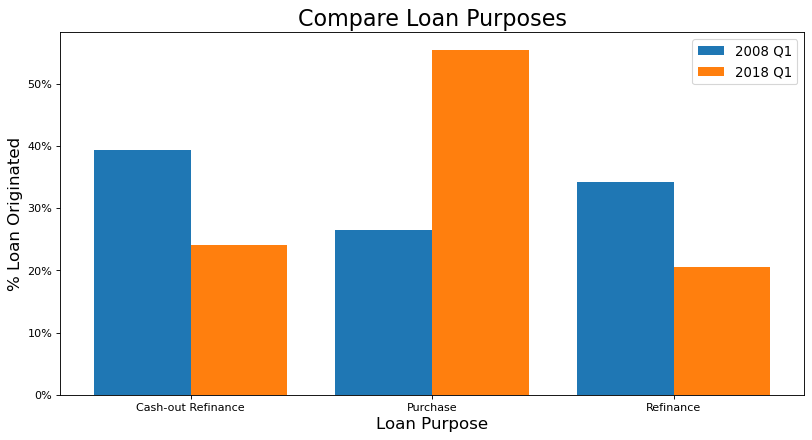

In [34]:
from matplotlib.pyplot import figure
import matplotlib.ticker as mtick  # for formating y axis

figure(figsize=(12, 6), dpi=80)

all_bands=['C', 'P', 'R']
x_axis=np.arange(len(all_bands))

# width of each bar
width=0.3

plt.bar(x_axis-0.2, purpose_twofiles['loan count pct 2008 Q1'], width=0.4, label='2008 Q1')
plt.bar(x_axis+0.2, purpose_twofiles['loan count pct 2018 Q1'], width=0.4, label='2018 Q1')

plt.xlabel("Loan Purpose", fontsize=15)
plt.ylabel("% Loan Originated", fontsize=15)
plt.title("Compare Loan Purposes", fontsize=20)
plt.xticks(x_axis, ('Cash-out Refinance', 'Purchase', 'Refinance'))     # relabel loan purpose on the y axis
plt.gca().yaxis.set_major_formatter(mtick.PercentFormatter(xmax=1.0))     # format y axis in %
plt.legend(loc='best', fontsize=12)
plt.show()

### Insights from data analysis:
* The above graph shows that in 2008 Q1, people were much more likely to do cash-out refinance. 
* In 2018 Q1, people were more likely to get loans for purchase. 
* The interest rate in 2018 Q1 was quite low, which explains the higher percentage of refinance. 

### Analysis 3: Interest-only mortgage

In [35]:
nodup_2008q1.groupby('IO')['LOAN_ID'].count()

IO
N    37105
Name: LOAN_ID, dtype: int64

In [36]:
nodup_2008q1['interest_only']=np.where(nodup_2008q1['IO'].str.strip()=='N', 0, 1)
nodup_2018q1['interest_only']=np.where(nodup_2018q1['IO'].str.strip()=='N', 0, 1)

print("Percentage of interest-only loans in Q1 2008: {}".format(nodup_2008q1['interest_only'].mean()))
print("Percentage of interest-only loans in Q1 2018: {}".format(nodup_2018q1['interest_only'].mean()))

Percentage of interest-only loans in Q1 2008: 0.1992360316809461
Percentage of interest-only loans in Q1 2018: 0.0


C:\Users\aleci\AppData\Local\Temp/ipykernel_3904/1460138938.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  nodup_2008q1['interest_only']=np.where(nodup_2008q1['IO'].str.strip()=='N', 0, 1)
C:\Users\aleci\AppData\Local\Temp/ipykernel_3904/1460138938.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  nodup_2018q1['interest_only']=np.where(nodup_2018q1['IO'].str.strip()=='N', 0, 1)


### in Q1 2008, 20% of loans originated only required borrowers to play interest.  The unpaid balance will accrue to principal balance.
* Why was there such a policy there? Weren't people afraid their mortgage debt becomes bigger and bigger?
* Well, at that time people expected the house price will go up quickly.  They expected to sell their house some years later to earn a big profit.
* For example, they purchased a house at 600k and made only interest payment each month.  After a year, they principal balance increased to 620K.
* However, they expected to sell their house after a year at 700k, so they could still make a profit of 80k. 
* After the financial meltdown, almost no interest-only mortgage loans were allowed to be approved. 

### Analysis 4: Original Loan-to-value ratio (LTV)
* LTV=loan amount/house price
* OLTV=Original LTV.  That is, LTV at the time when a loan application is underwritten. 
* If the house was solded at 500K and the borrower made a down payment of 100k, then LTV=80%.
* A lower LTV usually usually make the loan more likely to be approved. 
* After a borrower has made some payments (to both interest and principal), the loan amount will decrease. As a result, LTV will also decrease.

* Before financial meltdown in 2008 when interest-only payment was allowed (as in Analysis 3), some borrowers would see they LTV increase because unpaid principal balance will accrue to loan amount, and hence a higher LTV.

In [37]:
nodup_2008q1['OLTV'].describe()

count    46337.000000
mean        73.030106
std         15.483105
min          2.000000
25%         66.000000
50%         78.000000
75%         80.000000
max         97.000000
Name: OLTV, dtype: float64

In [38]:
# get the percentile of OLTV
print("OLTV 25th percentile in Q1 2008: {}".format(nodup_2008q1['OLTV'].quantile(0.25)))
print("OLTV 50th percentile in Q1 2008: {}".format(nodup_2008q1['OLTV'].quantile(0.5)))
print("OLTV 75th percentile in Q1 2008: {}".format(nodup_2008q1['OLTV'].quantile(0.75)))
print("OLTV 99.99th percentile in Q1 2008: {}".format(nodup_2008q1['OLTV'].quantile(0.9999)))
print(" ")
print("OLTV 25th percentile in Q1 2018: {}".format(nodup_2018q1['OLTV'].quantile(0.25)))
print("OLTV 50th percentile in Q1 2018: {}".format(nodup_2018q1['OLTV'].quantile(0.5)))
print("OLTV 75th percentile in Q1 2018: {}".format(nodup_2018q1['OLTV'].quantile(0.75)))
print("OLTV 99.99th percentile in Q1 2018: {}".format(nodup_2018q1['OLTV'].quantile(0.9999)))

# We did not use 100the percentile (maximum value) because there could be data errors.  For example, 100 might be mistyped for 10000.

OLTV 25th percentile in Q1 2008: 66.0
OLTV 50th percentile in Q1 2008: 78.0
OLTV 75th percentile in Q1 2008: 80.0
OLTV 99.99th percentile in Q1 2008: 97.0
 
OLTV 25th percentile in Q1 2018: 70.0
OLTV 50th percentile in Q1 2018: 80.0
OLTV 75th percentile in Q1 2018: 90.0
OLTV 99.99th percentile in Q1 2018: 97.0


In [39]:
percentile=['25th', '50th', '75th', '99th']

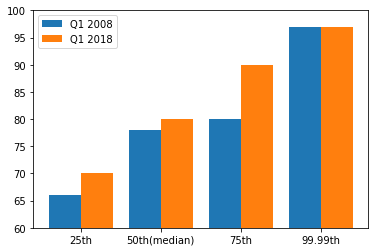

In [40]:
percentile_bar=['25th', '50th(median)', '75th', '99.99th']
data2008=[nodup_2008q1['OLTV'].quantile(0.25), nodup_2008q1['OLTV'].quantile(0.5), nodup_2008q1['OLTV'].quantile(0.75), nodup_2008q1['OLTV'].quantile(0.9999)]
data2018=[nodup_2018q1['OLTV'].quantile(0.25), nodup_2018q1['OLTV'].quantile(0.5), nodup_2018q1['OLTV'].quantile(0.75), nodup_2018q1['OLTV'].quantile(0.9999)]

x_axis=np.arange(len(percentile_bar))

plt.bar(x_axis -0.2, data2008, width=0.4, label = 'Q1 2008')
plt.bar(x_axis +0.2, data2018, width=0.4, label = 'Q1 2018')
plt.xticks(x_axis, percentile_bar)
plt.ylim([60, 100])
plt.legend()
plt.show()

In [42]:
print("LTV in Q1 2009: {}".format(nodup_2008q1['OLTV'].mean()))
print("LTV in Q1 2018: {}".format(nodup_2018q1['OLTV'].mean()))

LTV in Q1 2009: 73.03010553121696
LTV in Q1 2018: 76.94341170038273


#### The above chart is a bit counter-intuitive, but there is an explanation.
* Before the financial meltdown, it was very easily to get loans, and people usually made lower down payments for mortgage. The LTV then was supposed to be higher. 
* But the chart shows that LTV was actually lower in 2008 than in 2020. Why? Becausse house price was inflated then, which made LTV looked lower. 

### Analysis 5: Debt-to-income ratio (DTI)
* DTI=monthly total debt/monthly income
* Debt could include credit card payment, auto loans, student loans, child support, payment for other mortgages, and payment for current mortgage.
* Maximum DTI allowed these days is 0.43. 
* If one's monthly income is 5K, he cannot buy a house with monthly payment of 5K or even 4K or 3K.
* This is because we assume a borrower will have other spending in life such as food, children's expense, various insurance, medical needs, etc.
* However, this restriction was very loose before the financial meltdown in Q3 2008. 
* Hypothesis: DTI before financial meltdown in Q3 2008 was higher than in 2020

In [43]:
nodup_2008q1['DTI'].describe()

count    45076.000000
mean        36.690012
std         12.794426
min          1.000000
25%         27.000000
50%         36.000000
75%         46.000000
max         64.000000
Name: DTI, dtype: float64

In [44]:
nodup_2018q1['DTI'].describe()

count    51211.000000
mean        35.109215
std          9.736983
min          1.000000
25%         28.000000
50%         36.000000
75%         43.000000
max         50.000000
Name: DTI, dtype: float64

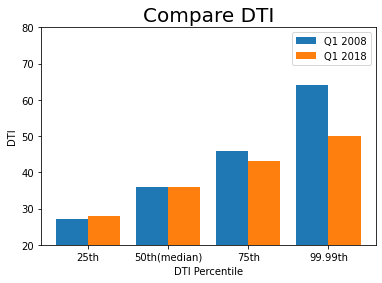

In [45]:
x='DTI'

percentile_bar=['25th', '50th(median)', '75th', '99.99th']
data2008=[nodup_2008q1[x].quantile(0.25), nodup_2008q1[x].quantile(0.5), nodup_2008q1[x].quantile(0.75), nodup_2008q1[x].quantile(0.9999)]
data2018=[nodup_2018q1[x].quantile(0.25), nodup_2018q1[x].quantile(0.5), nodup_2018q1[x].quantile(0.75), nodup_2018q1[x].quantile(0.9999)]

x_axis=np.arange(len(percentile_bar))

plt.bar(x_axis -0.2, data2008, width=0.4, label = 'Q1 2008')
plt.bar(x_axis +0.2, data2018, width=0.4, label = 'Q1 2018')
plt.xticks(x_axis, percentile_bar)
plt.xlabel("DTI Percentile")
plt.ylabel("DTI")
plt.ylim([20, 80])  # we set this range from 20 in order to accentuate the difference between two periods
plt.title("Compare DTI", fontsize=20)
plt.legend(loc='best')
plt.show()

#### The above chart confirms our hypothesis. People went crazy in buying houses 14 or 15 years ago.
* They borrowed more than they could pay later and house prices did not go up enough or quickly enough.  The bomb finally exploded in Q3 2008. 
* This was the subprime crisis (次贷危机) 14 years ago.

### Analysis 6 - Derogatory Behavior
* Derogatory behavior (usually called 'derog' in the industry) includes: delinquency, charge-off and foreclosure
* Delinquency （违约）: failure to make a payment
    * Delinqneucy=1 or bucket=1: failure to make payment for 1st time
    * Delinquency=2 or bucket=2: failure to make payment for 2 consecutive months
    * ......
    * Delinquency=6: failure to make payments for consecutive 6 months.  It is considered charge-off
    * ......
    * Delinquency=10: failure to make payments for consecutive 10 months.
    * ......
* Charge-off: failure to make payments for consecutive 6 months (or 180 days). A lender usually thinks you are unwilling or unable to pay.
* Foreclosure: when a borrower have failed to make payments for too many months, the bank (borrower) will seize the property.  In this case, we also say the property has been repossessed (repo).

    
* If a borrower is experiencing a financial stress (such as loss of job or a big medical bill), he/she can discuss with the borrower to find a temporary solution.
* Possible solutions: 
    * The lender allows the borrower to pay interest only each month without penalty for a period of time untile the latter gets on his/her feet again. 
    * The lender allows the house to be put on a short sale, i.e., to be sold below its market price. both parties share the loss.
* Borrowers in this situation are considered to be in forbearance, i.e., they are struggling to keep a good records. 
* But forbearance is also a sign of risk. The borrower (the bank) also suffer from a loss. 
     
#### We want to see how fico FICO score, LTV and DTI has impact on derogatory behavior
* Because loans originated in Q1 2008 have a longer performance history than loans originated in Q1 2020, 
* so the former are more likely to encounter bad behavior.
* To make an apple to apple comparison, we will use the two years to compare their performance. 

In [47]:
file_2018q1.groupby("FORECLOSURE_DATE")['LOAN_ID'].count()

FORECLOSURE_DATE
12019.0     3
12020.0     3
22020.0     3
32020.0     1
42019.0     3
42021.0     1
52019.0     4
52021.0     1
62019.0     1
62020.0     1
72019.0     2
82019.0     2
82020.0     1
92019.0     1
92020.0     1
102019.0    6
102020.0    1
112018.0    1
112019.0    4
112021.0    2
122019.0    2
Name: LOAN_ID, dtype: int64

In [48]:
file_2018q1["FORECLOSURE_COSTS"].describe()

count       37.000000
mean      4303.217027
std       3224.095226
min         12.130000
25%       1724.570000
50%       3394.510000
75%       6443.540000
max      12655.300000
Name: FORECLOSURE_COSTS, dtype: float64

In [50]:
file_2018q1["OTHER_FORECLOSURE_PROCEEDS"].describe()

count        36.000000
mean      28579.478889
std       59483.067814
min           0.000000
25%           0.000000
50%          27.315000
75%       15902.882500
max      268172.450000
Name: OTHER_FORECLOSURE_PROCEEDS, dtype: float64

In [51]:
file_2018q1["FORECLOSURE_PRINCIPAL_WRITE_OFF_AMOUNT"].describe()

count    21760.0
mean         0.0
std          0.0
min          0.0
25%          0.0
50%          0.0
75%          0.0
max          0.0
Name: FORECLOSURE_PRINCIPAL_WRITE_OFF_AMOUNT, dtype: float64

In [52]:
file_2018q1.groupby("FORBEARANCE_INDICATOR")['LOAN_ID'].count()

FORBEARANCE_INDICATOR
7    655375
F     28014
N     11817
R       310
T      1902
Name: LOAN_ID, dtype: int64

* It looks like anything except 7 can be considered as forbearance

In [53]:
# Keep the performance data of first two years only
file_2008q1.columns.tolist()

['POOL_ID',
 'LOAN_ID',
 'ACT_PERIOD',
 'CHANNEL',
 'SELLER',
 'SERVICER',
 'MASTER_SERVICER',
 'ORIG_RATE',
 'CURR_RATE',
 'ORIG_UPB',
 'ISSUANCE_UPB',
 'CURRENT_UPB',
 'ORIG_TERM',
 'ORIG_DATE',
 'FIRST_PAY',
 'LOAN_AGE',
 'REM_MONTHS',
 'ADJ_REM_MONTHS',
 'MATR_DT',
 'OLTV',
 'OCLTV',
 'NUM_BO',
 'DTI',
 'CSCORE_B',
 'CSCORE_C',
 'FIRST_FLAG',
 'PURPOSE',
 'PROP',
 'NO_UNITS',
 'OCC_STAT',
 'STATE',
 'MSA',
 'ZIP',
 'MI_PCT',
 'PRODUCT',
 'PPMT_FLG',
 'IO',
 'FIRST_PAY_IO',
 'MNTHS_TO_AMTZ_IO',
 'DLQ_STATUS',
 'PMT_HISTORY',
 'MOD_FLAG',
 'MI_CANCEL_FLAG',
 'Zero_Bal_Code',
 'ZB_DTE',
 'LAST_UPB',
 'RPRCH_DTE',
 'CURR_SCHD_PRNCPL',
 'TOT_SCHD_PRNCPL',
 'UNSCHD_PRNCPL_CURR',
 'LAST_PAID_INSTALLMENT_DATE',
 'FORECLOSURE_DATE',
 'DISPOSITION_DATE',
 'FORECLOSURE_COSTS',
 'PROPERTY_PRESERVATION_AND_REPAIR_COSTS',
 'ASSET_RECOVERY_COSTS',
 'MISCELLANEOUS_HOLDING_EXPENSES_AND_CREDITS',
 'ASSOCIATED_TAXES_FOR_HOLDING_PROPERTY',
 'NET_SALES_PROCEEDS',
 'CREDIT_ENHANCEMENT_PROCEEDS',
 'REPUR

In [54]:
file_2008q1.groupby('ACT_PERIOD')['LOAN_ID'].count()

ACT_PERIOD
12008     11035
12009     44556
12010     37095
12011     29380
12012     23475
          ...  
122017     5104
122018     4278
122019     3642
122020     3016
122021     2280
Name: LOAN_ID, Length: 171, dtype: int64

In [55]:
file_2008q1['month']=round(file_2008q1['ACT_PERIOD']/10000)
file_2008q1['year']=round(file_2008q1['ACT_PERIOD']-file_2008q1['month']*10000)
file_2008q1['year_month']=file_2008q1['year']*100+file_2008q1['month'].astype(int)

file_2008q1[['ACT_PERIOD', 'year', 'month', 'year_month']].head(12)

,ACT_PERIOD,year,month,year_month
0,12008,2008.0,1.0,200801.0
1,22008,2008.0,2.0,200802.0
2,32008,2008.0,3.0,200803.0
3,42008,2008.0,4.0,200804.0
4,52008,2008.0,5.0,200805.0
5,62008,2008.0,6.0,200806.0
6,72008,2008.0,7.0,200807.0
7,82008,2008.0,8.0,200808.0
8,92008,2008.0,9.0,200809.0
9,102008,2008.0,10.0,200810.0


In [56]:
file_2018q1['month']=round(file_2018q1['ACT_PERIOD']/10000)
file_2018q1['year']=round(file_2018q1['ACT_PERIOD']-file_2018q1['month']*10000)
file_2018q1['year_month']=file_2018q1['year']*100+file_2018q1['month'].astype(int)

file_2018q1[['ACT_PERIOD', 'year', 'month', 'year_month']].head(12)

,ACT_PERIOD,year,month,year_month
0,22018,2018.0,2.0,201802.0
1,32018,2018.0,3.0,201803.0
2,42018,2018.0,4.0,201804.0
3,52018,2018.0,5.0,201805.0
4,62018,2018.0,6.0,201806.0
5,72018,2018.0,7.0,201807.0
6,82018,2018.0,8.0,201808.0
7,92018,2018.0,9.0,201809.0
8,102018,2018.0,10.0,201810.0
9,112018,2018.0,11.0,201811.0


* Loans originated in Q1 2008 have a much longer performance history.
* For an apple-to-apply comparison, we should compare loan performance for the same length of performance history. 
* As for loans originated in 2018, we only have a performance history of 3.5 years, we should apply the same length to loans originated in Q1 2008.

In [58]:
file_2008q1_2years=file_2008q1[file_2008q1['year_month'] < 201103]
file_2018q1_2years=file_2018q1[file_2018q1['year_month'] < 202203]

In [59]:
file_2008q1_2years['bad']=np.where((file_2008q1_2years["FORBEARANCE_INDICATOR"] != '7') | (pd.to_numeric(file_2008q1_2years['DLQ_STATUS'], errors='coerce') > 2), 1, 0)
file_2008q1_bad=file_2008q1_2years.groupby('LOAN_ID')['bad'].sum().reset_index()
file_2008q1_bad['bad']=np.where(file_2008q1_bad['bad'] > 0, 1, 0)

file_2018q1_2years['bad']=np.where((file_2018q1_2years["FORBEARANCE_INDICATOR"] != '7') | (pd.to_numeric(file_2018q1_2years['DLQ_STATUS'], errors='coerce') > 2), 1, 0)
file_2018q1_bad=file_2018q1_2years.groupby('LOAN_ID')['bad'].sum().reset_index()
file_2018q1_bad['bad']=np.where(file_2018q1_bad['bad'] > 0, 1, 0)

C:\Users\aleci\AppData\Local\Temp/ipykernel_3904/859998125.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  file_2008q1_2years['bad']=np.where((file_2008q1_2years["FORBEARANCE_INDICATOR"] != '7') | (pd.to_numeric(file_2008q1_2years['DLQ_STATUS'], errors='coerce') > 2), 1, 0)
C:\Users\aleci\AppData\Local\Temp/ipykernel_3904/859998125.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  file_2018q1_2years['bad']=np.where((file_2018q1_2years["FORBEARANCE_INDICATOR"] != '7') | (pd.to_numeric(file_2018q1_2year

In [60]:
file_2008q1_2years['bad']=np.where(pd.to_numeric(file_2008q1_2years['DLQ_STATUS'], errors='coerce') > 3, 1, 0)
file_2008q1_bad=file_2008q1_2years.groupby('LOAN_ID')['bad'].sum().reset_index()
file_2008q1_bad['bad']=np.where(file_2008q1_bad['bad'] > 0, 1, 0)

file_2018q1_2years['bad']=np.where(pd.to_numeric(file_2018q1_2years['DLQ_STATUS'], errors='coerce') > 3, 1, 0)
file_2018q1_bad=file_2018q1_2years.groupby('LOAN_ID')['bad'].sum().reset_index()
file_2018q1_bad['bad']=np.where(file_2018q1_bad['bad'] > 0, 1, 0)

C:\Users\aleci\AppData\Local\Temp/ipykernel_3904/4219866485.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  file_2008q1_2years['bad']=np.where(pd.to_numeric(file_2008q1_2years['DLQ_STATUS'], errors='coerce') > 3, 1, 0)
C:\Users\aleci\AppData\Local\Temp/ipykernel_3904/4219866485.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  file_2018q1_2years['bad']=np.where(pd.to_numeric(file_2018q1_2years['DLQ_STATUS'], errors='coerce') > 3, 1, 0)


In [62]:
print("Bad rate for mortgages originated in Q1 2008:"+str(file_2008q1_bad['bad'].mean()))
print("Bad rate for mortgages originated in Q1 2018:"+str(file_2018q1_bad['bad'].mean()))

Bad rate for mortgages originated in Q1 2008:0.07436821546496321
Bad rate for mortgages originated in Q1 2018:0.043153948293368743


## Analysis 6: FICO and other factors on Risk
* The following anlaysis uses mortgages originated in Q1 2020 only. 

In [86]:
#file_2018q1['bad']=np.where((file_2018q1["FORBEARANCE_INDICATOR"] != '7') | (pd.to_numeric(file_2018q1['DLQ_STATUS'], errors='coerce') > 6), 1, 0)
file_2018q1['bad']=np.where(pd.to_numeric(file_2018q1['DLQ_STATUS'], errors='coerce') > 6, 1, 0)
bad_2018q1=file_2018q1.groupby('LOAN_ID')['bad'].sum().reset_index()

In [87]:
bad_2018q1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51212 entries, 0 to 51211
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype
---  ------   --------------  -----
 0   LOAN_ID  51212 non-null  int64
 1   bad      51212 non-null  int32
dtypes: int32(1), int64(1)
memory usage: 600.3 KB


In [88]:
bad_2018q1['derogatory']=np.where(bad_2018q1['bad'] > 0, 1, 0)

nodup_2018q1_more=pd.merge(nodup_2018q1, bad_2018q1, on='LOAN_ID', how='inner')

In [89]:
bad_2018q1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51212 entries, 0 to 51211
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   LOAN_ID     51212 non-null  int64
 1   bad         51212 non-null  int32
 2   derogatory  51212 non-null  int32
dtypes: int32(2), int64(1)
memory usage: 800.3 KB


In [90]:
nodup_2018q1_more['fico_band']=nodup_2018q1_more['min_fico'].apply(fico_tier)

In [91]:
nodup_2018q1_more.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 51212 entries, 0 to 51211
Columns: 113 entries, POOL_ID to derogatory
dtypes: float64(77), int32(3), int64(9), object(24)
memory usage: 44.0+ MB


In [92]:
nodup_2018q1_more.groupby('fico_band')['derogatory'].mean()

fico_band
581-620    0.107143
621-660    0.076923
661-700    0.055101
701-740    0.031819
741-780    0.016627
781-820    0.010169
820+       0.005931
Name: derogatory, dtype: float64

In [100]:
# We need to make use of the original file with entire performance history
# If a borrower has shown any derogatory behavior, we will consider his/her as 'bad'
# DLQ means delinquency. 

file_2018q1['delinquency']=np.where(pd.to_numeric(file_2018q1['DLQ_STATUS'], errors='coerce') > 2, 1, 0)
file_2018q1['charge-off']=np.where(pd.to_numeric(file_2018q1['DLQ_STATUS'], errors='coerce') > 6, 1, 0)
file_2018q1['MI']=np.where(pd.to_numeric(file_2018q1['MI_TYPE']) > 0, 1, 0)
bad_more_2018q1=file_2018q1.groupby('LOAN_ID')[['forbearance', 'delinquency', 'charge-off', 'MI']].sum().reset_index()

bad_more_2018q1['forbearance']=np.where(bad_more_2018q1['forbearance'] > 0, 1, 0)
bad_more_2018q1['delinquency']=np.where(bad_more_2018q1['delinquency'] > 0, 1, 0)
bad_more_2018q1['charge-off']=np.where(bad_more_2018q1['charge-off'] > 0, 1, 0)
bad_more_2018q1['MI']=np.where(bad_more_2018q1['MI'] > 0, 1, 0)

In [101]:
nodup_2018q1_more2=pd.merge(nodup_2018q1_more, bad_more_2018q1, on='LOAN_ID', how='inner')
nodup_2018q1_more2['bad']=np.where(nodup_2018q1_more2['bad'] > 0, 1, 0)
nodup_2018q1_more2.fillna(0, inplace=True)

In [102]:
nodup_2018q1_more2.groupby('fico_band')['bad', 'delinquency', 'charge-off', 'MI', "ORIG_RATE"].mean()

C:\Users\aleci\AppData\Local\Temp/ipykernel_3904/3729845188.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  nodup_2018q1_more2.groupby('fico_band')['bad', 'delinquency', 'charge-off', 'MI', "ORIG_RATE"].mean()


,bad,delinquency,charge-off,MI,ORIG_RATE
fico_band,,,,,
581-620,0.107143,0.160714,0.107143,0.160714,4.514018
621-660,0.076923,0.146712,0.076923,0.285050,4.576913
661-700,0.055101,0.104201,0.055101,0.359520,4.402912
701-740,0.031819,0.061851,0.031819,0.397226,4.243755
741-780,0.016627,0.035515,0.016627,0.371974,4.129168
781-820,0.010169,0.019653,0.010169,0.293419,4.067262
820+,0.005931,0.014037,0.005931,0.230130,4.035772


In [104]:
summary_derogatory=nodup_2018q1_more2.groupby('fico_band')['bad', 'forbearance', 'delinquency', 'charge-off', "ORIG_RATE"].mean().reset_index()

C:\Users\aleci\AppData\Local\Temp/ipykernel_3904/2854426799.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  summary_derogatory=nodup_2018q1_more2.groupby('fico_band')['bad', 'forbearance', 'delinquency', 'charge-off', "ORIG_RATE"].mean().reset_index()


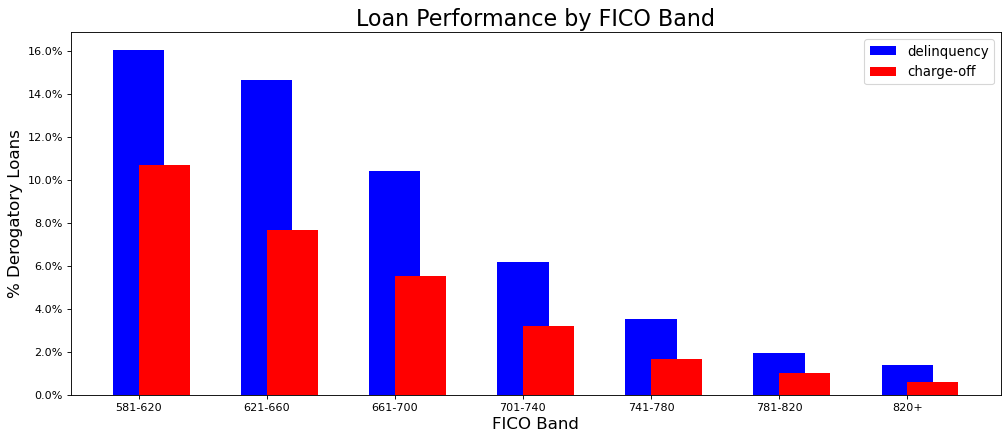

In [107]:
from matplotlib.pyplot import figure
import matplotlib.ticker as mtick  # for formating y axis

figure(figsize=(15, 6), dpi=80)

all_bands=['581-620', '621-660', '661-700', '701-740', '741-780', '781-820', '820+']  # notice that we no longer have 580 & Below
x_axis=np.arange(len(all_bands))

# width of each bar
width=0.05

plt.bar(x_axis+0.1, summary_derogatory['delinquency'], width=0.4, color='blue', label='delinquency')
plt.bar(x_axis+0.3, summary_derogatory['charge-off'], width=0.4, color='red', label='charge-off')

plt.xlabel("FICO Band", fontsize=15)
plt.ylabel("% Derogatory Loans", fontsize=15)
plt.title("Loan Performance by FICO Band", fontsize=20)
plt.xticks(x_axis+0.1, (all_bands))     # relabel loan purpose on the y axis
plt.gca().yaxis.set_major_formatter(mtick.PercentFormatter(xmax=1.0))     # format y axis in %
plt.legend(loc='best', fontsize=12)
plt.show()

* The above chart shows that borrowers with higher FICO scores are less risky. 

### Analyze 7 - Interest Rate
##### Question 1 - How does FICO impact interest rate one will get for the loan?

No handles with labels found to put in legend.


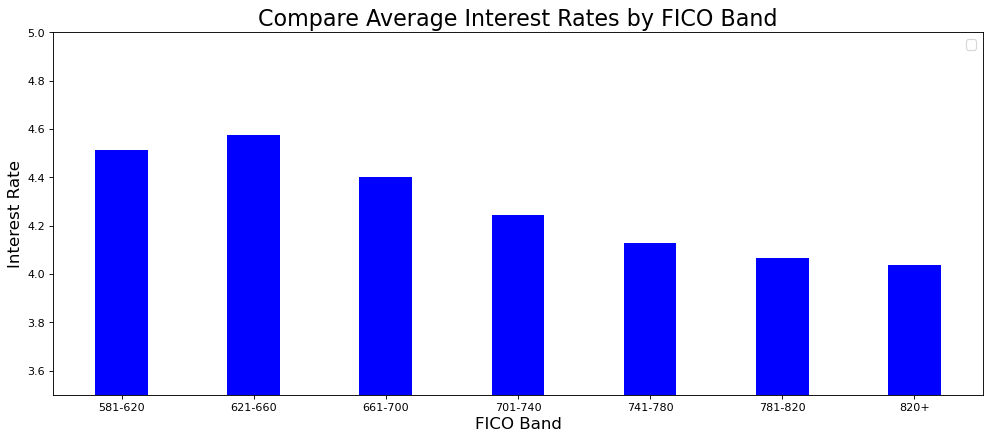

In [109]:
from matplotlib.pyplot import figure
import matplotlib.ticker as mtick  # for formating y axis

figure(figsize=(15, 6), dpi=80)

all_bands=['581-620', '621-660', '661-700', '701-740', '741-780', '781-820', '820+']  # notice that we no longer have 580 & Below
x_axis=np.arange(len(all_bands))

# width of each bar
width=0.05

plt.bar(x_axis-0.1, summary_derogatory["ORIG_RATE"], width=0.4, color='blue')

plt.xlabel("FICO Band", fontsize=15)
plt.ylabel("Interest Rate", fontsize=15)
plt.ylim([3.5, 5])
plt.title("Compare Average Interest Rates by FICO Band", fontsize=20)
plt.xticks(x_axis-0.1, (all_bands))     # relabel loan purpose on the y axis
plt.legend(loc='best', fontsize=12)
plt.show()

* Borrowers with higher FICO generally get lower/better interest rates.

#### Question 2 - How does LTV impact interest rate a borrower will get?

In [110]:
# I want to have LTV to be divided into 5 equally distributed bins/bands/tiers
print("OLTV 0.001th percentile in Q1 2018: {}".format(nodup_2018q1['OLTV'].quantile(0.001)))  # find lowest LTV
print("OLTV 20th percentile in Q1 2018: {}".format(nodup_2018q1['OLTV'].quantile(0.20)))
print("OLTV 40th percentile in Q1 2018: {}".format(nodup_2018q1['OLTV'].quantile(0.4)))
print("OLTV 60th percentile in Q1 2018: {}".format(nodup_2018q1['OLTV'].quantile(0.6)))
print("OLTV 80th percentile in Q1 2018: {}".format(nodup_2018q1['OLTV'].quantile(0.8)))

OLTV 0.001th percentile in Q1 2018: 16.0
OLTV 20th percentile in Q1 2018: 65.0
OLTV 40th percentile in Q1 2018: 77.0
OLTV 60th percentile in Q1 2018: 80.0
OLTV 80th percentile in Q1 2018: 95.0


In [111]:
def ltv_band(x): 
    if x <= 63:
        return '15-63'
    elif x <= 75:
        return '64-75'
    elif x <= 80:
        return '76-80'
    elif x <= 90:
        return '81-90'
    else:
        return '90+'
    
nodup_2018q1['ltv_band']=nodup_2018q1['OLTV'].apply(ltv_band)

C:\Users\aleci\AppData\Local\Temp/ipykernel_3904/415832219.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  nodup_2018q1['ltv_band']=nodup_2018q1['OLTV'].apply(ltv_band)


In [114]:
ltv_rate=nodup_2018q1.groupby('ltv_band')["ORIG_RATE"].mean().reset_index()

No handles with labels found to put in legend.


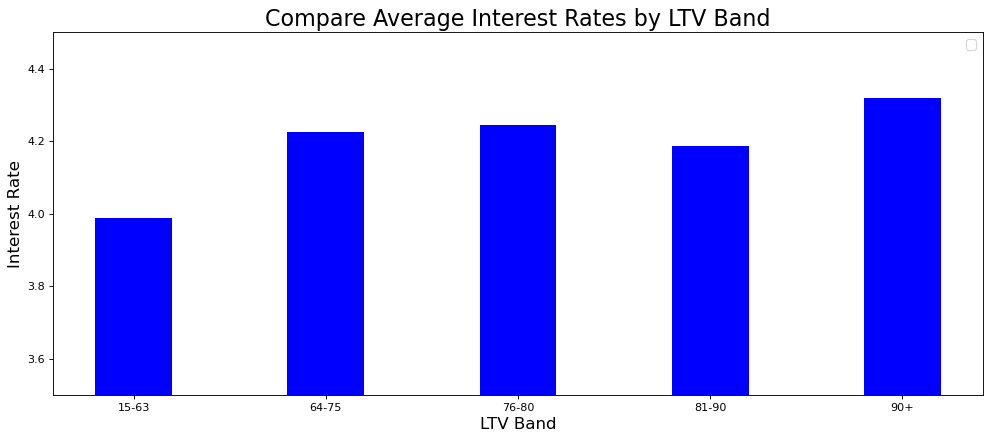

In [116]:
from matplotlib.pyplot import figure
import matplotlib.ticker as mtick  # for formating y axis

figure(figsize=(15, 6), dpi=80)

all_bands=['15-63', '64-75', '76-80', '81-90', '90+'] 
x_axis=np.arange(len(all_bands))

# width of each bar
width=0.05

plt.bar(x_axis-0.1, ltv_rate["ORIG_RATE"], width=0.4, color='blue')

plt.xlabel("LTV Band", fontsize=15)
plt.ylabel("Interest Rate", fontsize=15)
plt.ylim([3.5,4.5])
plt.title("Compare Average Interest Rates by LTV Band", fontsize=20)
plt.xticks(x_axis-width*2, (all_bands))     
plt.legend(loc='best', fontsize=12)
plt.show()

* lowes LTV indeed gets best/lowest rate because these loans are least risky. 

#### Question 3 - How does DTI impact interest rate

In [117]:
# I want to have DTI to be divided into 5 equally distributed bins/bands/tiers
print("DTI 0.001th percentile in Q1 2018: {}".format(nodup_2018q1['DTI'].quantile(0.001)))  # find lowest LTV
print("DTI 20th percentile in Q1 2018: {}".format(nodup_2018q1['DTI'].quantile(0.20)))
print("DTI 40th percentile in Q1 2018: {}".format(nodup_2018q1['DTI'].quantile(0.4)))
print("DTI 60th percentile in Q1 2018: {}".format(nodup_2018q1['DTI'].quantile(0.6)))
print("DTI 80th percentile in Q1 2018: {}".format(nodup_2018q1['DTI'].quantile(0.8)))

DTI 0.001th percentile in Q1 2018: 7.0
DTI 20th percentile in Q1 2018: 26.0
DTI 40th percentile in Q1 2018: 33.0
DTI 60th percentile in Q1 2018: 39.0
DTI 80th percentile in Q1 2018: 45.0


In [118]:
def dti_band(x):
    if x <= 25: 
        return '07-25'
    elif x <= 32:
        return '26-32'
    elif x <=37:
        return '33-37'
    elif x <= 43:
        return '38-43'
    else:
        return '43+'
    
nodup_2018q1['dti_band']=nodup_2018q1['DTI'].apply(dti_band)

C:\Users\aleci\AppData\Local\Temp/ipykernel_3904/1305666399.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  nodup_2018q1['dti_band']=nodup_2018q1['DTI'].apply(dti_band)


In [119]:
dti_rate=nodup_2018q1.groupby('dti_band')['ORIG_RATE'].mean().reset_index()

No handles with labels found to put in legend.


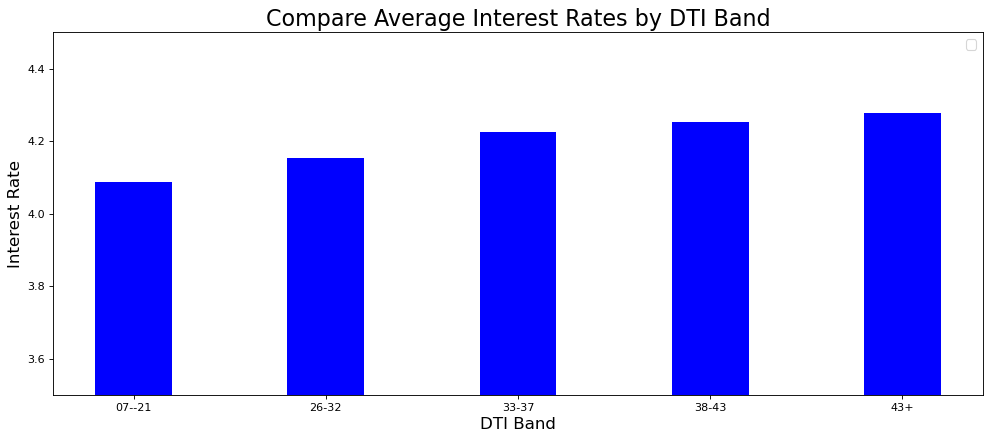

In [121]:
figure(figsize=(15, 6), dpi=80)

all_bands=['07--21', '26-32', '33-37', '38-43', '43+'] 
x_axis=np.arange(len(all_bands))

# width of each bar
width=0.05

plt.bar(x_axis-0.1, dti_rate["ORIG_RATE"], width=0.4, color='blue')

plt.xlabel("DTI Band", fontsize=15)
plt.ylabel("Interest Rate", fontsize=15)
plt.ylim([3.5, 4.5])
plt.title("Compare Average Interest Rates by DTI Band", fontsize=20)
plt.xticks(x_axis-width*2, (all_bands))     
plt.legend(loc='best', fontsize=12)
plt.show()

* Borrowers with lower DTI will get lower/better rates.

#### Question 4 - How do two factors such as FICO and LTV jointly impact interest rate?

In [122]:
# We get the pivot table to get the summary data
fico_ltv_rate=nodup_2018q1.pivot_table(index='fico_band', columns='ltv_band', values='ORIG_RATE', dropna=False)
fico_ltv_rate

ltv_band,15-63,64-75,76-80,81-90,90+
fico_band,,,,,
581-620,4.238750,4.665250,4.591667,3.955000,4.645833
621-660,4.307930,4.574475,4.706356,4.585139,4.703909
661-700,4.130205,4.416424,4.495803,4.365682,4.486621
701-740,4.026601,4.240830,4.274614,4.216194,4.342199
741-780,3.940280,4.161702,4.135514,4.103101,4.227185
781-820,3.888901,4.097649,4.106020,4.087212,4.187401
820+,3.877437,4.051468,4.110296,4.080127,4.171998


Text(69.0, 0.5, 'FICO Band')

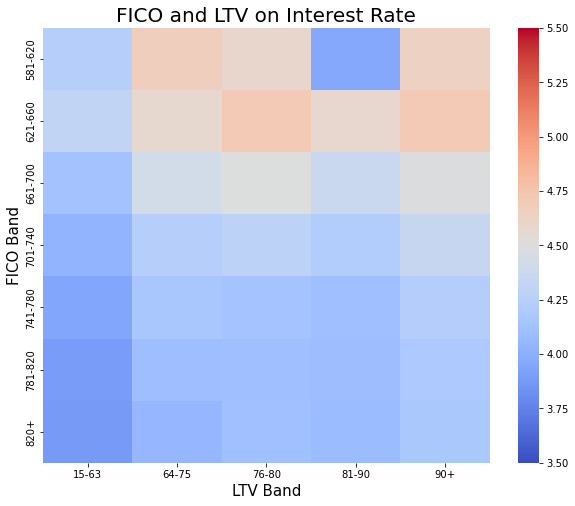

In [123]:
# We use seaborn to visualize the pivot table above
fig=plt.figure(figsize=(10, 8))
ax=plt.axes()
sns.heatmap(fico_ltv_rate, cmap='coolwarm', fmt="", vmin=3.5,vmax=5.5)
ax.set_title("FICO and LTV on Interest Rate", fontsize=20)
ax.set_xlabel('LTV Band', fontsize=15)
ax.set_ylabel('FICO Band', fontsize=15)

Text(69.0, 0.5, 'FICO Band')

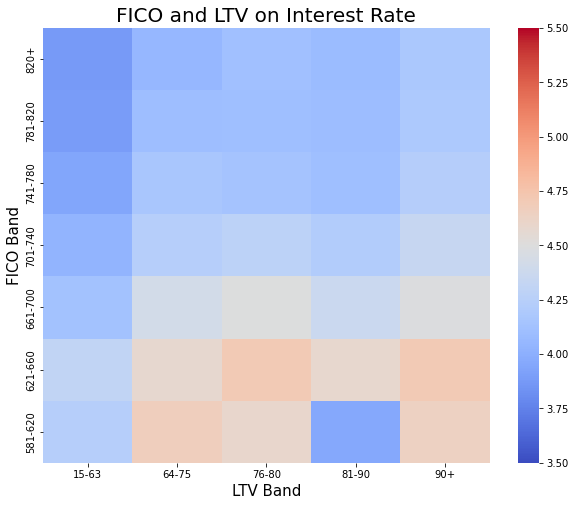

In [124]:
# However, the above chart has the FICO band listed from highest to lowest, which is not good. 
# Let's invert the y axis
fig=plt.figure(figsize=(10, 8))
ax=plt.axes()
sns.heatmap(fico_ltv_rate, cmap='coolwarm', fmt="", vmin=3.5,vmax=5.5).invert_yaxis()  # see the last option added
ax.set_title("FICO and LTV on Interest Rate", fontsize=20)
ax.set_xlabel('LTV Band', fontsize=15)
ax.set_ylabel('FICO Band', fontsize=15)

Text(69.0, 0.5, 'FICO Band')

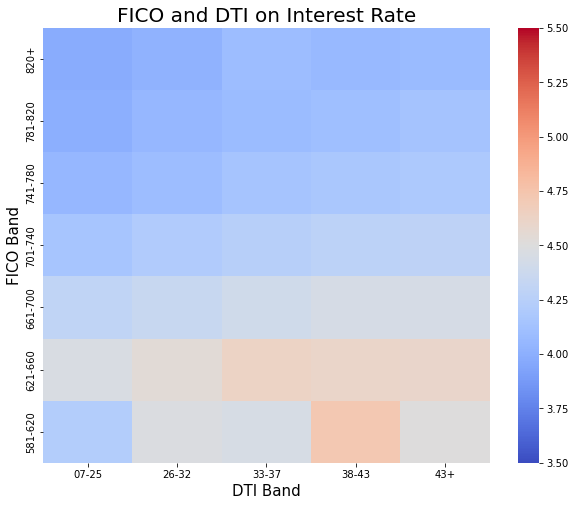

In [125]:
# We can run the same analysis on FICO and DTI
fico_dti_rate=nodup_2018q1.pivot_table(index='fico_band', columns='dti_band', values='ORIG_RATE', dropna=False)

fig=plt.figure(figsize=(10, 8))
ax=plt.axes()
sns.heatmap(fico_dti_rate, cmap='coolwarm', fmt="", vmin=3.5,vmax=5.5).invert_yaxis()  # see the last option added
ax.set_title("FICO and DTI on Interest Rate", fontsize=20)
ax.set_xlabel('DTI Band', fontsize=15)
ax.set_ylabel('FICO Band', fontsize=15)

C:\Users\aleci\AppData\Local\Temp/ipykernel_3904/5154097.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  nodup_2018q1['fico_tier']=nodup_2018q1['min_fico'].apply(fico_tier)
C:\Users\aleci\AppData\Local\Temp/ipykernel_3904/5154097.py:32: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  nodup_2018q1['ltv_tier']=nodup_2018q1['OLTV'].apply(ltv_tier)
C:\Users\aleci\AppData\Local\Temp/ipykernel_3904/5154097.py:47: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try us

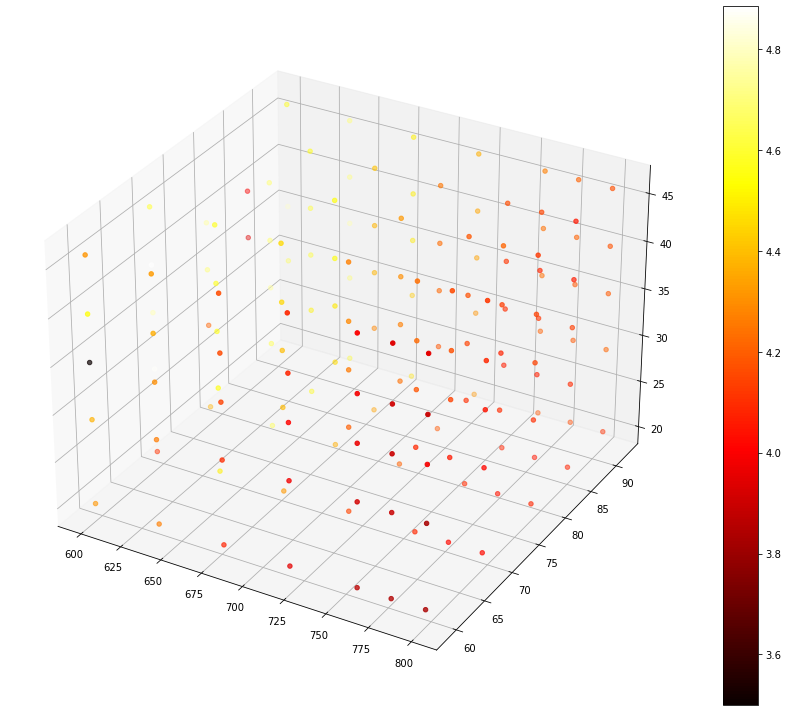

In [126]:
def fico_tier(x):
    if x <= 620: 
        return 600
    elif x <= 660:
        return 640
    elif x <= 700:
        return 680
    elif x <= 740:
        return 720
    elif x <=780:
        return 760
    elif x <=800:
        return 780
    else:
        return 800
    
nodup_2018q1['fico_tier']=nodup_2018q1['min_fico'].apply(fico_tier) 


def ltv_tier(x):
    if x <= 63:
        return 59
    elif x <= 75:
        return 69
    elif x <= 80:
        return 78
    elif x <= 90:
        return 85
    else:
        return 92
    
nodup_2018q1['ltv_tier']=nodup_2018q1['OLTV'].apply(ltv_tier)   


def dti_tier(x):
    if x <= 25: 
        return 20
    elif x <= 32:
        return 29
    elif x <=37:
        return 35
    elif x <= 43:
        return 40
    else:
        return 46
    
nodup_2018q1['dti_tier']=nodup_2018q1['DTI'].apply(dti_tier)



fico_ltv_dti_rate=nodup_2018q1.groupby(['fico_tier', 'ltv_tier', 'dti_tier'])['ORIG_RATE'].mean().reset_index()

from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import numpy as np

plt.rcParams["figure.figsize"] = [12, 10]
plt.rcParams["figure.autolayout"] = True
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

img = ax.scatter(fico_ltv_dti_rate['fico_tier'], fico_ltv_dti_rate['ltv_tier'], fico_ltv_dti_rate['dti_tier'], 
                 c=fico_ltv_dti_rate['ORIG_RATE'], cmap=plt.hot())
fig.colorbar(img)
plt.show()

* The above table is does not show the pattern obviously
* Let's plot the raw attributes

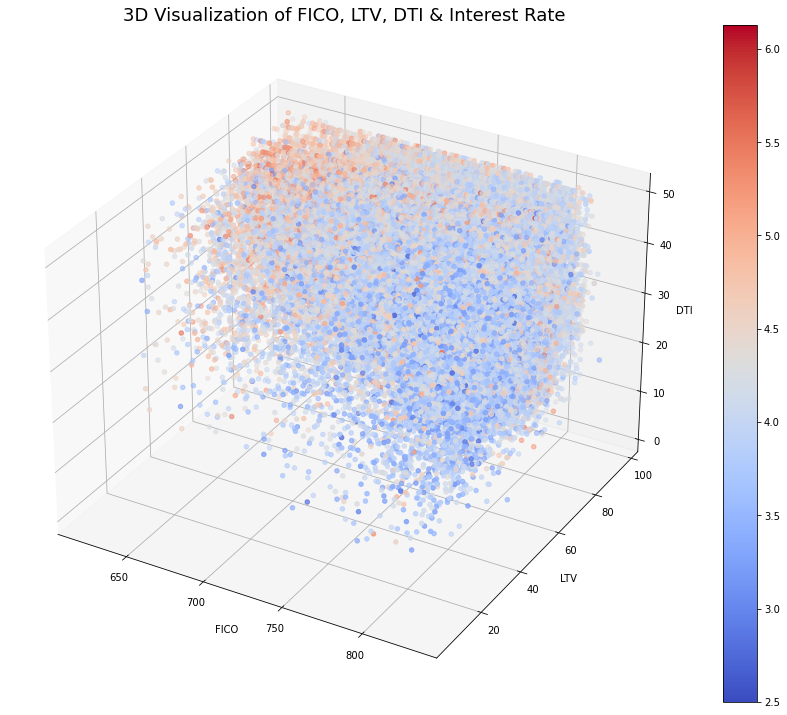

In [130]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import numpy as np

plt.rcParams["figure.figsize"] = [12, 10]
plt.rcParams["figure.autolayout"] = True
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

img = ax.scatter(nodup_2018q1['min_fico'], nodup_2018q1['OLTV'], nodup_2018q1['DTI'], 
                 c=nodup_2018q1['ORIG_RATE'], cmap='coolwarm')
fig.colorbar(img)
ax.set_xlabel('FICO')
ax.set_ylabel('LTV')
ax.set_zlabel('DTI')
ax.set_title('3D Visualization of FICO, LTV, DTI & Interest Rate', fontsize=18)
plt.show()

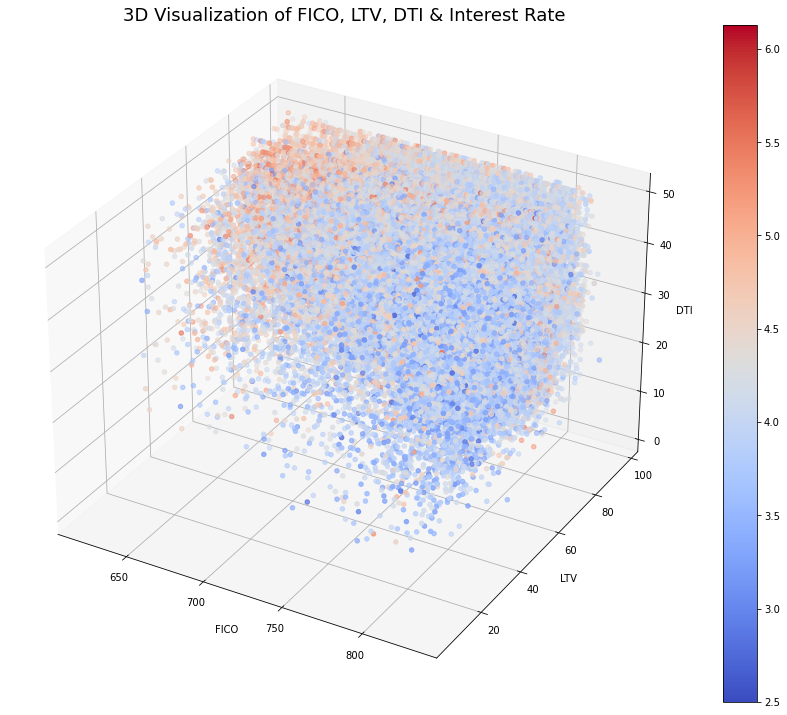

In [131]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import numpy as np

plt.rcParams["figure.figsize"] = [12, 10]
plt.rcParams["figure.autolayout"] = True
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

img = ax.scatter(nodup_2018q1['min_fico'], nodup_2018q1['OLTV'], nodup_2018q1['DTI'], 
                 c=nodup_2018q1['ORIG_RATE'], cmap='coolwarm')
fig.colorbar(img)
ax.set_xlabel('FICO')
ax.set_ylabel('LTV')
ax.set_zlabel('DTI')
ax.set_title('3D Visualization of FICO, LTV, DTI & Interest Rate', fontsize=18)
plt.show()

* This chart is a bit too crowded
* Let's make a 10% sample to make the pattern more obvious

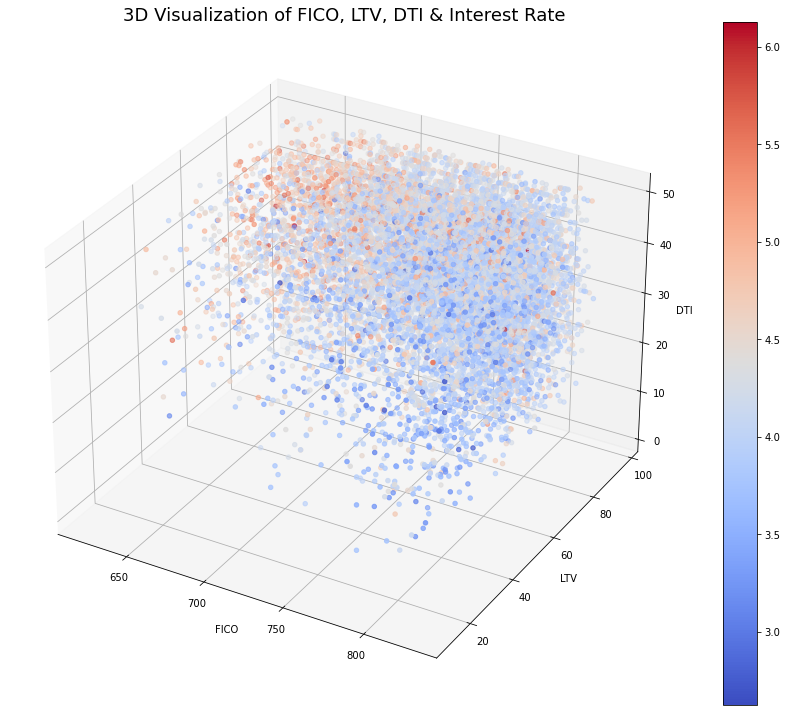

In [132]:
nodup_samp=nodup_2018q1[(np.random.uniform(0, 1, len(nodup_2018q1['LOAN_ID'])) < 0.2)]

plt.rcParams["figure.figsize"] = [12, 10]
plt.rcParams["figure.autolayout"] = True
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

img = ax.scatter(nodup_samp['min_fico'], nodup_samp['OLTV'], nodup_samp['DTI'], 
                 c=nodup_samp['ORIG_RATE'], cmap='coolwarm')
fig.colorbar(img)
ax.set_xlabel('FICO')
ax.set_ylabel('LTV')
ax.set_zlabel('DTI')
ax.set_title('3D Visualization of FICO, LTV, DTI & Interest Rate', fontsize=18)
plt.show()

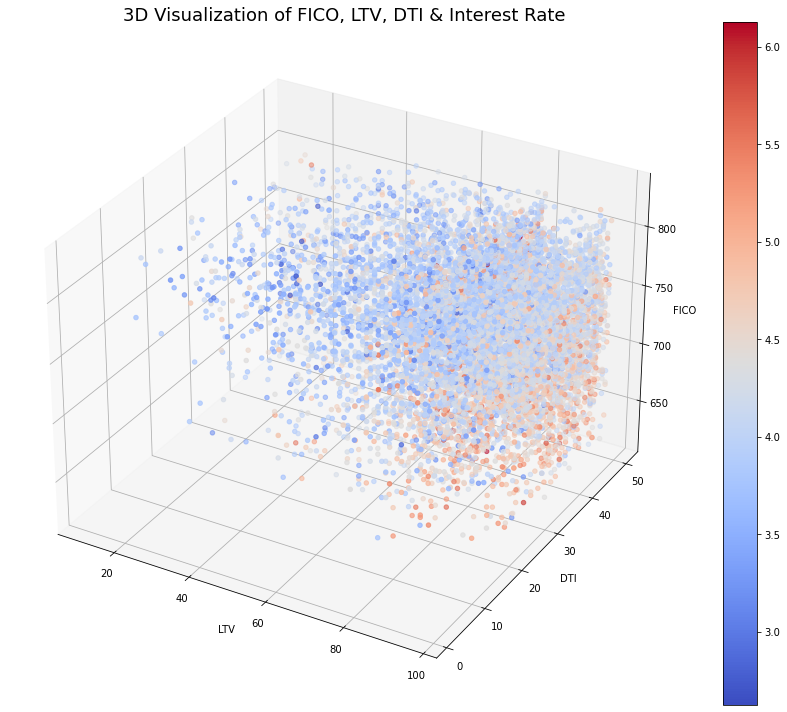

In [133]:
# YOu cal also change the dimensions
plt.rcParams["figure.figsize"] = [12, 10]
plt.rcParams["figure.autolayout"] = True
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

img = ax.scatter(nodup_samp['OLTV'], nodup_samp['DTI'], nodup_samp['min_fico'],
                 c=nodup_samp['ORIG_RATE'], cmap='coolwarm')
fig.colorbar(img)
ax.set_zlabel('FICO')
ax.set_xlabel('LTV')
ax.set_ylabel('DTI')
ax.set_title('3D Visualization of FICO, LTV, DTI & Interest Rate', fontsize=18)
plt.show()

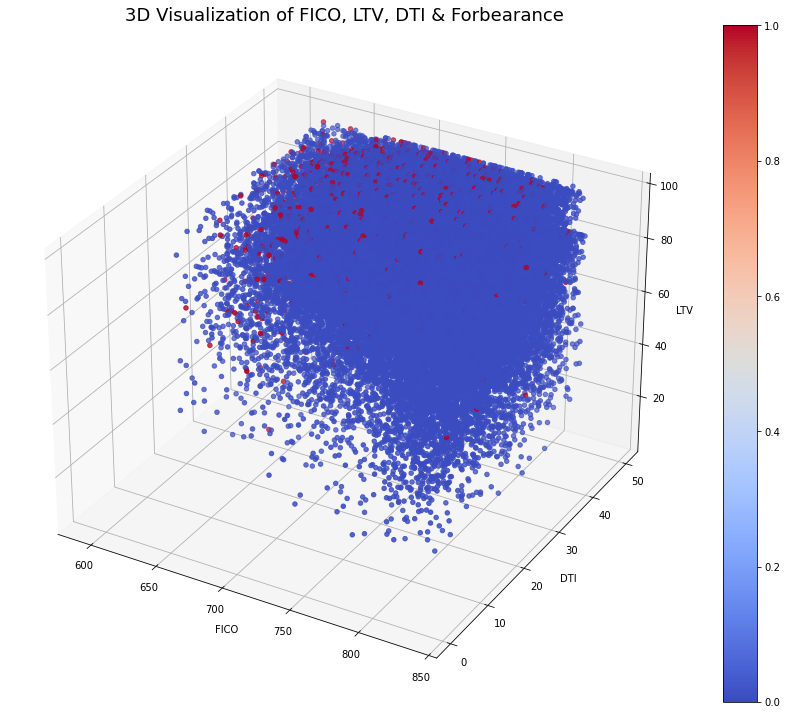

In [134]:
# We can also visualize derogatory behavior
# YOu cal also change the dimensions
plt.rcParams["figure.figsize"] = [12, 10]
plt.rcParams["figure.autolayout"] = True
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

img = ax.scatter(nodup_2018q1_more2['min_fico'], nodup_2018q1_more2['DTI'], nodup_2018q1_more2['OLTV'],
                 c=nodup_2018q1_more2['charge-off'], cmap='coolwarm')
fig.colorbar(img)
ax.set_xlabel('FICO')
ax.set_zlabel('LTV')
ax.set_ylabel('DTI')
ax.set_title('3D Visualization of FICO, LTV, DTI & Forbearance', fontsize=18)
ax.set_xlim(580, 850)
plt.show()

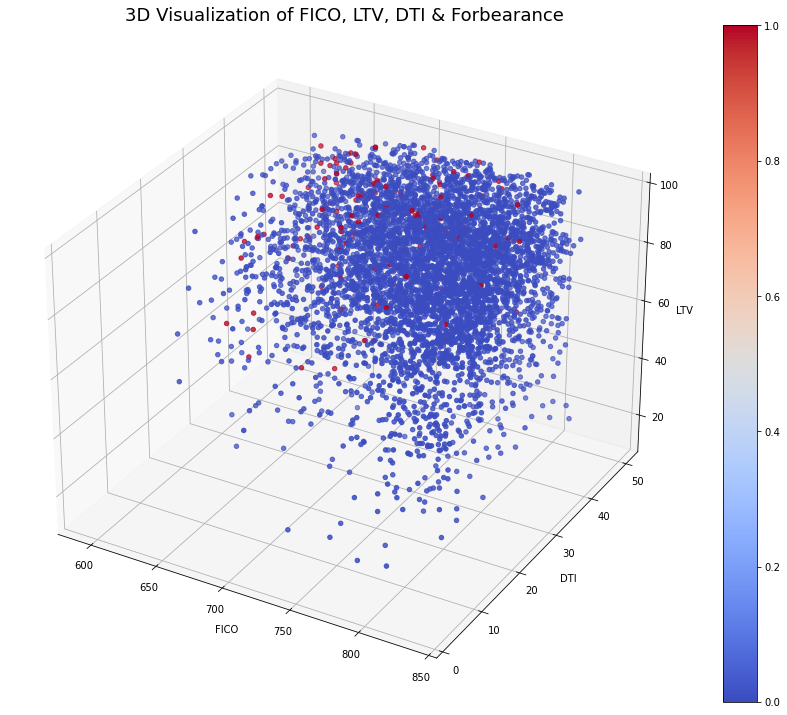

In [135]:
# make a sample so that the graph will look less busy
nodup_samp2=nodup_2018q1_more2[(np.random.uniform(0, 1, len(nodup_2018q1_more2['LOAN_ID'])) < 0.1)]


plt.rcParams["figure.figsize"] = [12, 10]
plt.rcParams["figure.autolayout"] = True
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

img = ax.scatter(nodup_samp2['min_fico'], nodup_samp2['DTI'], nodup_samp2['OLTV'],
                 c=nodup_samp2['charge-off'], cmap='coolwarm')
fig.colorbar(img)
ax.set_xlabel('FICO')
ax.set_zlabel('LTV')
ax.set_ylabel('DTI')
ax.set_title('3D Visualization of FICO, LTV, DTI & Forbearance', fontsize=18)
ax.set_xlim(580, 850)
plt.show()

### Analysis 8 - Logistic Regression to find causal effects by some factors
* When the outcome variable is binary (0 or 1), it is a classification model. 
* We apply logistic regression to gather insights. 
* This is a bit different from the EV adoption exercise when the outcome (EV market share) is a continouos variable with a lot of values.

In [75]:
nodup_samp2.columns.tolist()

['POOL_ID',
 'LOAN_ID',
 'ACT_PERIOD',
 'CHANNEL',
 'SELLER',
 'SERVICER',
 'MASTER_SERVICER',
 'ORIG_RATE',
 'CURR_RATE',
 'ORIG_UPB',
 'ISSUANCE_UPB',
 'CURRENT_UPB',
 'ORIG_TERM',
 'ORIG_DATE',
 'FIRST_PAY',
 'LOAN_AGE',
 'REM_MONTHS',
 'ADJ_REM_MONTHS',
 'MATR_DT',
 'OLTV',
 'OCLTV',
 'NUM_BO',
 'DTI',
 'CSCORE_B',
 'CSCORE_C',
 'FIRST_FLAG',
 'PURPOSE',
 'PROP',
 'NO_UNITS',
 'OCC_STAT',
 'STATE',
 'MSA',
 'ZIP',
 'MI_PCT',
 'PRODUCT',
 'PPMT_FLG',
 'IO',
 'FIRST_PAY_IO',
 'MNTHS_TO_AMTZ_IO',
 'DLQ_STATUS',
 'PMT_HISTORY',
 'MOD_FLAG',
 'MI_CANCEL_FLAG',
 'Zero_Bal_Code',
 'ZB_DTE',
 'LAST_UPB',
 'RPRCH_DTE',
 'CURR_SCHD_PRNCPL',
 'TOT_SCHD_PRNCPL',
 'UNSCHD_PRNCPL_CURR',
 'LAST_PAID_INSTALLMENT_DATE',
 'FORECLOSURE_DATE',
 'DISPOSITION_DATE',
 'FORECLOSURE_COSTS',
 'PROPERTY_PRESERVATION_AND_REPAIR_COSTS',
 'ASSET_RECOVERY_COSTS',
 'MISCELLANEOUS_HOLDING_EXPENSES_AND_CREDITS',
 'ASSOCIATED_TAXES_FOR_HOLDING_PROPERTY',
 'NET_SALES_PROCEEDS',
 'CREDIT_ENHANCEMENT_PROCEEDS',
 'REPUR

C:\Users\aleci\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='bad', ylabel='count'>

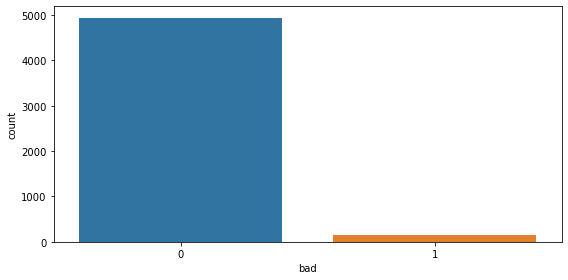

In [161]:
from matplotlib import rcParams

rcParams['figure.figsize'] = 8,4
sns.countplot(nodup_samp2['bad'])

<AxesSubplot:title={'center':'Correlation with Bad'}>

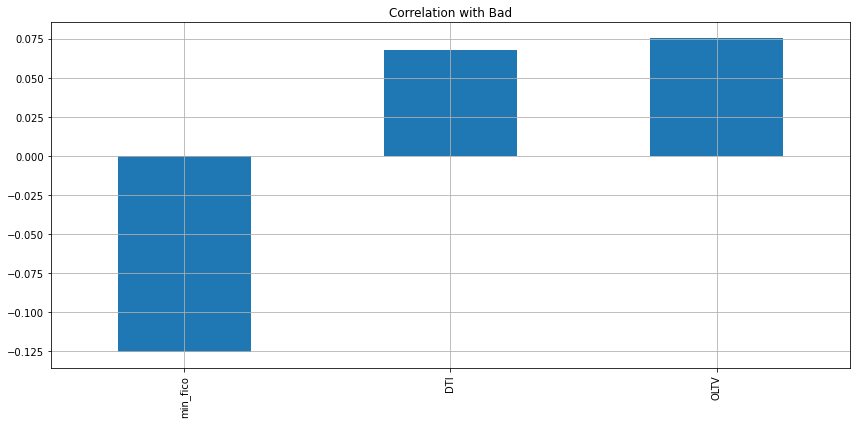

In [147]:
nodup_samp2[['min_fico', 'DTI', 'OLTV']].corrwith(nodup_samp2['bad']).plot.bar(
figsize=(12,6), title='Correlation with Bad', grid=True)

<AxesSubplot:>

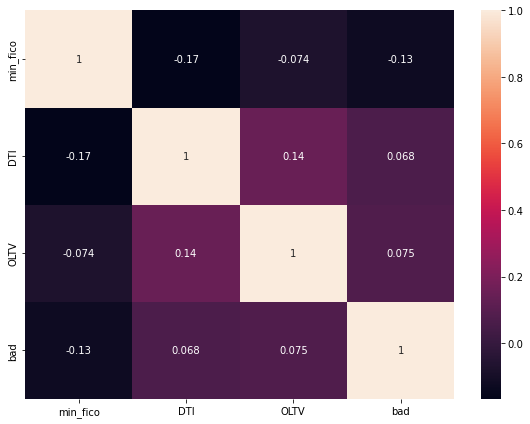

In [153]:
corr=nodup_samp2[['min_fico', 'DTI', 'OLTV', 'bad']].corr()
plt.figure(figsize=(8, 6))
sns.heatmap(corr, annot=True)

In [136]:
import statsmodels.formula.api as smf

#fit logistic regression model
model = smf.logit('bad ~ min_fico + DTI + OLTV', data=nodup_2018q1_more2).fit()

#view model summary
print(model.summary())

Optimization terminated successfully.
         Current function value: 0.117933
         Iterations 8
                           Logit Regression Results                           
Dep. Variable:                    bad   No. Observations:                51212
Model:                          Logit   Df Residuals:                    51208
Method:                           MLE   Df Model:                            3
Date:                Tue, 27 Dec 2022   Pseudo R-squ.:                 0.05978
Time:                        19:14:14   Log-Likelihood:                -6039.6
converged:                       True   LL-Null:                       -6423.6
Covariance Type:            nonrobust   LLR p-value:                3.853e-166
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -1.5090      0.327     -4.614      0.000      -2.150      -0.868
min_fico      -0.0073      0.

#### We look at two things: coef (variable coefficient) & P value (<0.05 usually means good)
* FICO: coef=-0.0073, P value=0.  Negative coefficient means higher FICO suggests lower risk
* DTI: coef=0.0489, P value=0. Positive coefficient means higher DTI suggests higher risk.
* OLTV: coef=0.00181, P value=0.  Positive sign means high LTV suggests higher risk.

Optimization terminated successfully.
         Current function value: 0.117891
         Iterations 8
                           Logit Regression Results                           
Dep. Variable:                    bad   No. Observations:                51212
Model:                          Logit   Df Residuals:                    51207
Method:                           MLE   Df Model:                            4
Date:                Wed, 28 Dec 2022   Pseudo R-squ.:                 0.06011
Time:                        00:29:11   Log-Likelihood:                -6037.4
converged:                       True   LL-Null:                       -6423.6
Covariance Type:            nonrobust   LLR p-value:                7.697e-166
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept       -2.6145      0.626     -4.177      0.000      -3.841      -1.388
min_fico        -0.0074

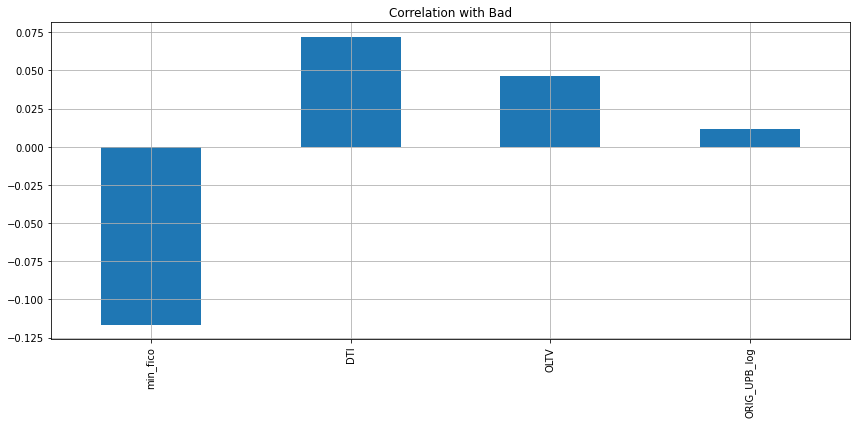

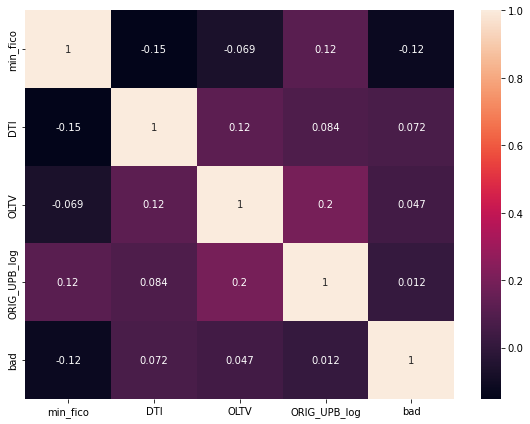

In [154]:
# We want to add original loan amount or original unpaid balance (ORIG_UPB) to the regression

# We transform the balance to a log form so that the value will look too big
# The method is called monotonic transformation (check out online for its definition)
nodup_2018q1_more2['ORIG_UPB_log']=np.log(nodup_2018q1_more2['ORIG_UPB'])

nodup_2018q1_more2[['min_fico', 'DTI', 'OLTV', 'ORIG_UPB_log']].corrwith(nodup_2018q1_more2['bad']).plot.bar(
figsize=(12,6), title='Correlation with Bad', grid=True)

corr=nodup_2018q1_more2[['min_fico', 'DTI', 'OLTV', 'ORIG_UPB_log', 'bad']].corr()
plt.figure(figsize=(8, 6))
sns.heatmap(corr, annot=True)

model = smf.logit('bad ~ min_fico + DTI + OLTV + ORIG_UPB_log', data=nodup_2018q1_more2).fit()

#view model summary
print(model.summary())

* FICO: coef=-0.0074, P value=0. Negative coefficient means higher FICO suggests lower risk
* DTI: coef=0.0484, P value=0. Positive coefficient means higher DTI suggests higher risk.
* OLTV: coef=0.0175, P value=0. Positive sign means high LTV suggests higher risk.
* ORIG_UPB_log: coef=0.1028, P value < 0.05. Positive coefficient means higher original loan amount suggests higher risk. 

C:\Users\aleci\AppData\Local\Temp/ipykernel_3904/3888101316.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  nodup_samp['ORIG_UPB_log']=np.log(nodup_samp['ORIG_UPB'])


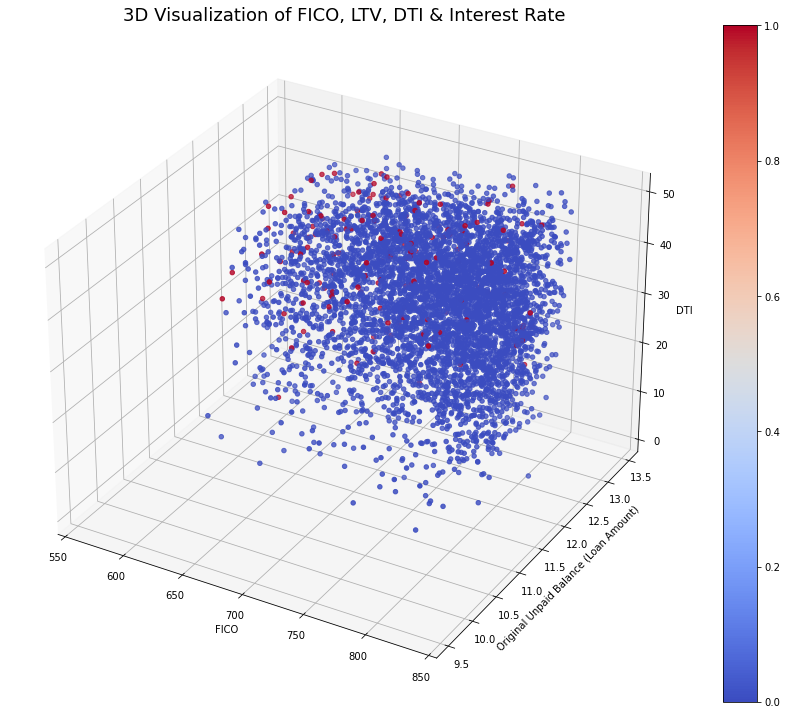

In [138]:
nodup_samp2=nodup_2018q1_more2[(np.random.uniform(0, 1, len(nodup_2018q1_more2['LOAN_ID'])) < 0.1)]
nodup_samp['ORIG_UPB_log']=np.log(nodup_samp['ORIG_UPB'])

plt.rcParams["figure.figsize"] = [12, 10]
plt.rcParams["figure.autolayout"] = True
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

img = ax.scatter(nodup_samp2['min_fico'], nodup_samp2['ORIG_UPB_log'], nodup_samp2['DTI'], 
                 c=nodup_samp2['bad'], cmap='coolwarm')
fig.colorbar(img)
ax.set_xlabel('FICO')
ax.set_xlim(550, 850)
ax.set_ylabel('Original Unpaid Balance (Loan Amount)')
ax.set_zlabel('DTI')
ax.set_title('3D Visualization of FICO, LTV, DTI & Interest Rate', fontsize=18)
plt.show()